In [1]:
#source - https://www.kaggle.com/mathurinache/blockchain-tweets
from google.colab import files
uploaded = files.upload()

Saving blockchain_tweets.csv to blockchain_tweets (2).csv


We shall dive into a collection of Blackchain tweets for some explanatory data analysis and visualization. We will see if we can find any interesting patterns or questions to answer, then clean a portion of this information for some analysis with deep learning via a neural network in another file.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load in the data
df = pd.read_csv("blockchain_tweets.csv")

In [4]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 20:02:49+00:00,#blockchain Y I N C. C O M is hiring for the f...,['blockchain'],blockwork_ai,False
1,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19 22:05:58+00:00,1819,2221,266,False,2021-11-14 20:02:30+00:00,Check out this account on OpenSea https://t.co...,"['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...",Twitter Web App,False
2,❤️LacedWhales (CARDANO POOL: PEACE),NaN,1M+ $ADA whale txs laced with ❤️ from La @Reps...,2020-08-21 11:38:22+00:00,617,3,52,False,2021-11-14 20:02:24+00:00,🐳 #Cardano $ADA Whale ❤️laced!\n💰 Transaction ...,['Cardano'],laced-whales-dev,False
3,Wiscobus Ntukuyoh,Lagos,"Crypto Analyst |Crypto ambassador |$FIL,$DASH|...",2018-04-25 23:23:16+00:00,1114,4616,422,False,2021-11-14 20:02:20+00:00,🌈 Hop over to #Coinstore's App to trade now!!\...,"['Coinstore', 'CHZ', 'USDT', 'DENT', 'USDT', '...",Twitter for Android,False
4,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19 22:05:58+00:00,1819,2221,266,False,2021-11-14 20:02:18+00:00,Check out this account on OpenSea https://t.co...,"['nfts', 'nft', 'nftart', 'nftartist', 'nftcol...",Twitter Web App,False


In [5]:
df.describe

<bound method NDFrame.describe of                                 user_name  ... is_retweet
0                               Blockwork  ...      False
1                                  Rib-It  ...      False
2     ❤️LacedWhales (CARDANO POOL: PEACE)  ...      False
3                       Wiscobus Ntukuyoh  ...      False
4                                  Rib-It  ...      False
...                                   ...  ...        ...
9995                     Ucu Jaenurisalah  ...      False
9996  ❤️LacedWhales (CARDANO POOL: PEACE)  ...      False
9997                   Towolawi Oluwaseun  ...      False
9998                           $CRYPTOWOO  ...      False
9999  ❤️LacedWhales (CARDANO POOL: PEACE)  ...      False

[10000 rows x 13 columns]>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         10000 non-null  object
 1   user_location     3633 non-null   object
 2   user_description  8596 non-null   object
 3   user_created      10000 non-null  object
 4   user_followers    10000 non-null  int64 
 5   user_friends      10000 non-null  int64 
 6   user_favourites   10000 non-null  int64 
 7   user_verified     10000 non-null  bool  
 8   date              10000 non-null  object
 9   text              10000 non-null  object
 10  hashtags          6073 non-null   object
 11  source            10000 non-null  object
 12  is_retweet        10000 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 879.0+ KB


We have a mighty 10000 tweets to work with, as well as 13 columns of information. Let's start with asking *why* we are going through this information, and what could our analysis hope to achieve?

This collection gives us a bird's eye view of conversation surrounding blockchain technology on one of the most popular social media sites. So what we can look for is many facets, but what facets are worth examining, and what questions are worth asking?

First, parameters. According tweets have the #Blockchain hashtag. And the collection started on 01/01/2021. As this analysis is taking place in 12/2021, we can say the start is relatively recent. Blockchain is a topic which has hit the news with its functions and capabilities. However, with it being new and complex, there can be a lot of misunderstandings on what exactly it's for. 

Perhaps over the year we can see how sentiment has evolved, identify any trends in information or projects, and see if there are any major influences within the tweets. Is there a variance by location? How about NFT popularity? We can turn attention to more fruitful questions after answering some simpler ones.

Let's start with an easy set of questions surrounding our users.

In [7]:
#First, let's get a count of how many users there are in our dataframe, and how many of them are unique.
len(df['user_name'].unique().tolist()) #4997 unique users.

df['user_name'].unique()

array(['Blockwork', 'Rib-It', '❤️LacedWhales (CARDANO POOL: PEACE)', ...,
       'Ucu Jaenurisalah', 'Towolawi Oluwaseun', '$CRYPTOWOO'],
      dtype=object)

In [8]:
#We have our number of unique users, which makes up almost half of the tweets. 
#Let's get them and their information into its own dataframe after collecting some more data, like their individual number of tweets.

#Check if any user_name is NaN.
df.user_name.isnull().values.any() #No null values

#Get the tweet count per user
tweetcount = df.user_name.value_counts()

In [9]:
tweetcount = df.user_name.value_counts()
tweetcount

❤️LacedWhales (CARDANO POOL: PEACE)    1340
Follower                                 83
CryptoTick247                            80
the gradient studies                     72
nftTONE shaga                            61
                                       ... 
gwengwen                                  1
MD ALamIn IsLam                           1
Gejhos19                                  1
hyo hee                                   1
Syed Muhammad Waqas                       1
Name: user_name, Length: 4997, dtype: int64

In [10]:
#We can see a strikingly large difference between the users. Let's see how many of them have tweeted more than once.
tweetcount.value_counts(ascending=True)

29         1
43         1
35         1
31         1
22         1
18         1
61         1
41         1
59         1
25         1
83         1
1340       1
80         1
72         1
28         1
23         2
20         2
13         2
17         2
21         2
24         3
12         3
14         3
15         3
16         6
11         6
10         7
9         15
8         15
7         24
6         40
5         57
4        129
3        242
2        809
1       3610
Name: user_name, dtype: int64

In [11]:
#Interesting how activity drops rapidly for users after their first tweet, and drops almost as rapidly after the second tweet. Most don't even get past 10 tweets!
#Could there be a reason relating to their dates? Let's take a look at the date of user creation after making tweetcounts into a column for our dataframe.
tc = tweetcount.to_frame()
tc

,user_name
❤️LacedWhales (CARDANO POOL: PEACE),1340
Follower,83
CryptoTick247,80
the gradient studies,72
nftTONE shaga,61
...,...
gwengwen,1
MD ALamIn IsLam,1
Gejhos19,1
hyo hee,1


In [12]:
tc.reset_index(inplace=True)
tc.rename(columns={"index": "user_name", "user_name": "tweetcount"}, inplace=True)
tc

,user_name,tweetcount
0,❤️LacedWhales (CARDANO POOL: PEACE),1340
1,Follower,83
2,CryptoTick247,80
3,the gradient studies,72
4,nftTONE shaga,61
...,...,...
4992,gwengwen,1
4993,MD ALamIn IsLam,1
4994,Gejhos19,1
4995,hyo hee,1


In [13]:
tweets = pd.merge(df,tc,on='user_name')
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweetcount
0,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 20:02:49+00:00,#blockchain Y I N C. C O M is hiring for the f...,['blockchain'],blockwork_ai,False,21
1,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 19:02:24+00:00,#blockchain Beacon Crystal is hiring for the f...,['blockchain'],blockwork_ai,False,21
2,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 18:01:20+00:00,#blockchain Citi is hiring for the following p...,['blockchain'],blockwork_ai,False,21
3,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 17:01:48+00:00,#blockchain Cyber Coders is hiring for the fol...,['blockchain'],blockwork_ai,False,21
4,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,2021-11-14 16:00:21+00:00,"#blockchain City of San Jose, C A is hiring fo...",['blockchain'],blockwork_ai,False,21


In [14]:
tweets.info

<bound method DataFrame.info of                user_name  ... tweetcount
0              Blockwork  ...         21
1              Blockwork  ...         21
2              Blockwork  ...         21
3              Blockwork  ...         21
4              Blockwork  ...         21
...                  ...  ...        ...
9995        icemanCrypto  ...          1
9996  Cognosco Boomgaard  ...          1
9997    Ucu Jaenurisalah  ...          1
9998  Towolawi Oluwaseun  ...          1
9999          $CRYPTOWOO  ...          1

[10000 rows x 14 columns]>

In [15]:
#Now that we have a dataframe with our tweet count, let's get a dataframe for our user info only
users = tweets
users.drop(columns=['date', 'text', 'hashtags','source', 'is_retweet'], inplace=True)

In [16]:
users.drop_duplicates(subset=['user_name'], inplace=True)
users.reset_index(inplace=True)
users.drop(columns=['index'], inplace=True)

In [17]:
users.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount
0,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25 19:11:34+00:00,237,331,2,False,21
1,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19 22:05:58+00:00,1819,2221,266,False,24
2,❤️LacedWhales (CARDANO POOL: PEACE),NaN,1M+ $ADA whale txs laced with ❤️ from La @Reps...,2020-08-21 11:38:22+00:00,617,3,52,False,1340
3,Wiscobus Ntukuyoh,Lagos,"Crypto Analyst |Crypto ambassador |$FIL,$DASH|...",2018-04-25 23:23:16+00:00,1114,4616,422,False,1
4,Joy Kumar,"Dhaka, Bangladesh",simple man😊😊😊,2021-06-07 02:39:33+00:00,26,920,1007,False,1


In [18]:
#Now we have a dataframe with user information, let's deal with the dates. 
#First, let us remove that timeframe in the user_created section
users.user_created = users['user_created'].str[:10]
users.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount
0,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25,237,331,2,False,21
1,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19,1819,2221,266,False,24
2,❤️LacedWhales (CARDANO POOL: PEACE),NaN,1M+ $ADA whale txs laced with ❤️ from La @Reps...,2020-08-21,617,3,52,False,1340
3,Wiscobus Ntukuyoh,Lagos,"Crypto Analyst |Crypto ambassador |$FIL,$DASH|...",2018-04-25,1114,4616,422,False,1
4,Joy Kumar,"Dhaka, Bangladesh",simple man😊😊😊,2021-06-07,26,920,1007,False,1


In [19]:
#Now we can turn our attention to the dates. First of which, is to convert them to a datetime datatype
users['user_created'] = pd.to_datetime(users['user_created'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         4997 non-null   object        
 1   user_location     2054 non-null   object        
 2   user_description  4065 non-null   object        
 3   user_created      4997 non-null   datetime64[ns]
 4   user_followers    4997 non-null   int64         
 5   user_friends      4997 non-null   int64         
 6   user_favourites   4997 non-null   int64         
 7   user_verified     4997 non-null   bool          
 8   tweetcount        4997 non-null   int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(3)
memory usage: 317.3+ KB


In [20]:
#Let's find both the earliest and latest dates of account creation
print(users.user_created.min(), ' ',users.user_created.max())

2006-09-28 00:00:00   2021-11-14 00:00:00


In [21]:
#A wide time range. We can see how many accounts have been created since the year's start.
nyear = '2021-01-01'
mask1 = users['user_created'] <= nyear # created at or after 2021-01-01 
mask2 = users['user_created'] > nyear # created before 2021-01-01
print('Accounts created before 2021-01-01:',len(users.loc[mask2]) )
print('Accounts created at or after 2021-01-01:',len(users.loc[mask1]) )

Accounts created before 2021-01-01: 2733
Accounts created at or after 2021-01-01: 2264


In [22]:
#There's a sharp divide between users created 2021 and not. Let's map this to a column.
users['user_1y'] = mask1
users.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount,user_1y
0,Blockwork,NaN,Find a job in blockchain: https://t.co/7X6K6WK...,2018-02-25,237,331,2,False,21,True
1,Rib-It,NaN,🐸 RibIt 2021 YOU are the foundation of our cre...,2021-09-19,1819,2221,266,False,24,False
2,❤️LacedWhales (CARDANO POOL: PEACE),NaN,1M+ $ADA whale txs laced with ❤️ from La @Reps...,2020-08-21,617,3,52,False,1340,True
3,Wiscobus Ntukuyoh,Lagos,"Crypto Analyst |Crypto ambassador |$FIL,$DASH|...",2018-04-25,1114,4616,422,False,1,True
4,Joy Kumar,"Dhaka, Bangladesh",simple man😊😊😊,2021-06-07,26,920,1007,False,1,False


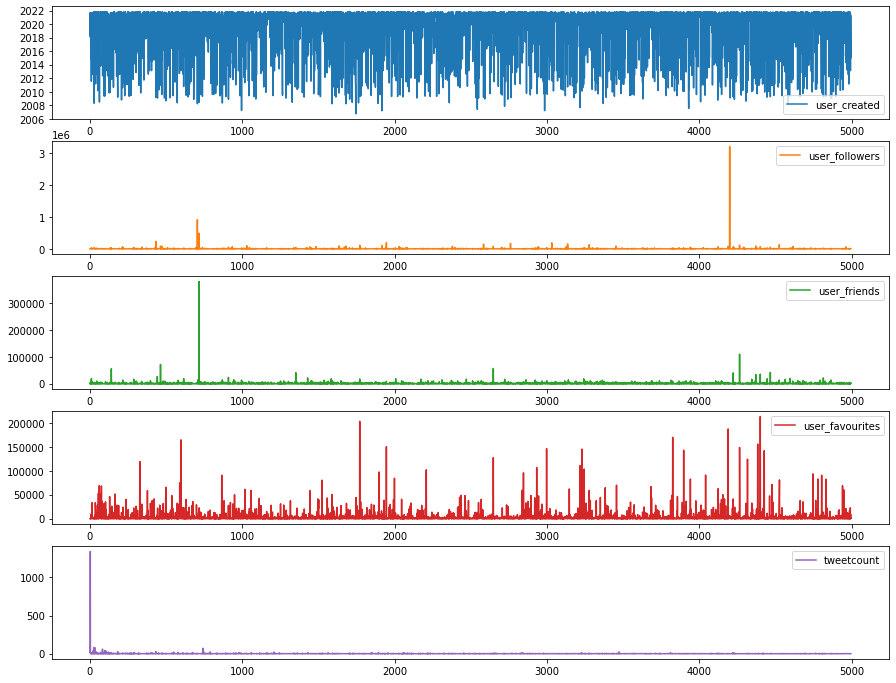

In [23]:
#With our Users dataframe complete, we can start digging in to some visualizations.
users.plot(subplots = True, figsize=(15,12), sharex=False, sharey=False)
plt.show()

In [24]:
#Let's turn our attention to the tweetcount column and see that massive difference on a smaller scale.
#Specifically a pie chart which shows the difference in tweet count 

a = len(users.loc[users['tweetcount'] > 0]) #3160
b = len(users.loc[(users['tweetcount'] <= 5) & ~(users['tweetcount'] < 2)]) #1687
c = len(users.loc[(users['tweetcount'] >=  6) & ~(users['tweetcount'] <= 5)]) #150
a = 3160
b = 1687
c = 150

In [25]:
x = len(users.loc[(users['tweetcount'] < 2) & (users['user_1y'] == False)]) #2015
y = len(users.loc[(users['tweetcount'] <= 5) & (users['user_1y'] == False)]) #654
z = len(users.loc[(users['tweetcount'] >= 6) & (users['user_1y'] == False)]) #64
x = 2015
y = 654
z = 64

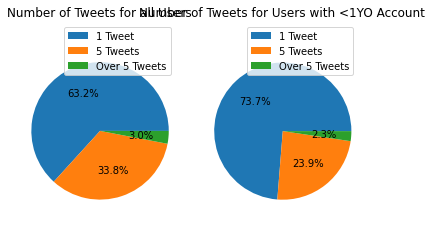

In [26]:
labels = '1 Tweet', '5 Tweets', 'Over 5 Tweets'
count = [a, b, c]

fig, axs = plt.subplots(1,2)
axs[0].pie(count, labels=labels, autopct='%1.1f%%', labeldistance = None)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[0].legend()
axs[0].set_title('Number of Tweets for all Users')

labels = '1 Tweet', '5 Tweets', 'Over 5 Tweets'
count = [x, y, z]

axs[1].pie(count, labels=labels, autopct='%1.1f%%', labeldistance = None)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axs[1].legend()
axs[1].set_title('Number of Tweets for Users with <1YO Account')

plt.rcParams["figure.figsize"] = (20,20)
plt.show()



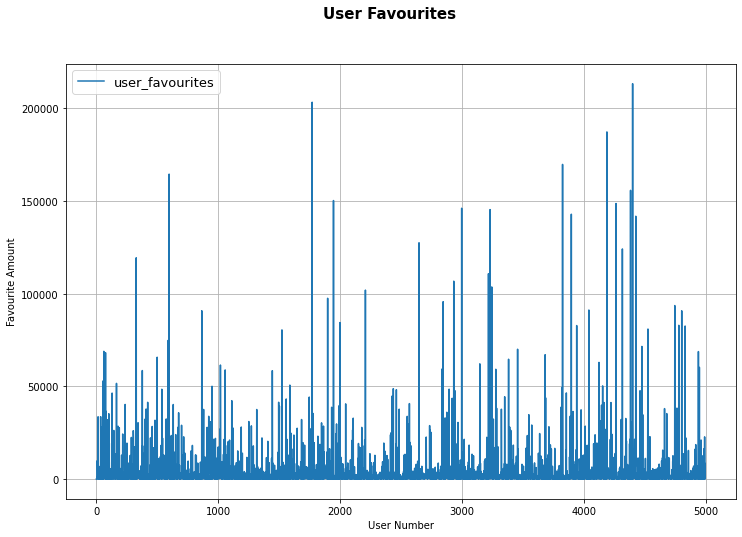

In [27]:
#We counted the values earlier, but seeing them in a chart format paints a proper picture. 
#What about User Favourites?
users.user_favourites.plot(figsize = (12,8), linestyle = '-')
plt.suptitle("User Favourites", fontsize = 15, fontweight='bold')
plt.legend(loc = "best", fontsize = 13)
plt.xlabel("User Number", fontsize = 10)
plt.ylabel("Favourite Amount", fontsize = 10)
plt.grid()
plt.show();

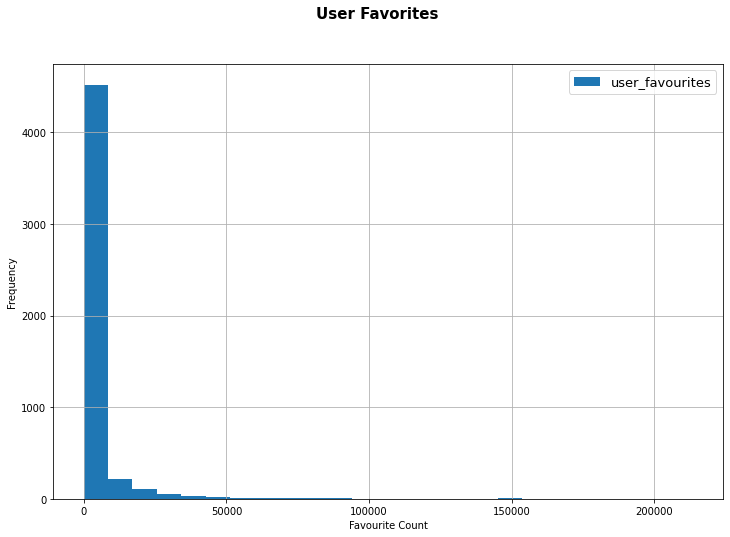

In [28]:
users.user_favourites.plot(kind='hist',figsize = (12,8), linestyle = '-', bins=25)
plt.suptitle("User Favorites", fontsize = 15, fontweight='bold')
plt.legend(loc = "best", fontsize = 13)
plt.xlabel("Favourite Count", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.grid()
plt.show();

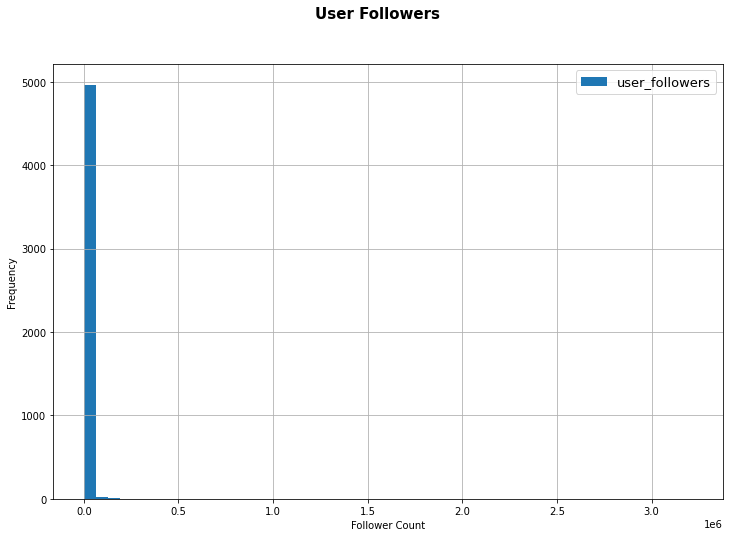

In [29]:
#We'll notice similar variance exists in user followers as well
users.user_followers.plot(kind='hist',figsize = (12,8), linestyle = '-', bins=50, density=False, cumulative=False)
plt.suptitle("User Followers", fontsize = 15, fontweight='bold')
plt.legend(loc = "best", fontsize = 13)
plt.xlabel("Follower Count", fontsize = 10)
plt.ylabel("Frequency", fontsize = 10)
plt.grid()
plt.show();

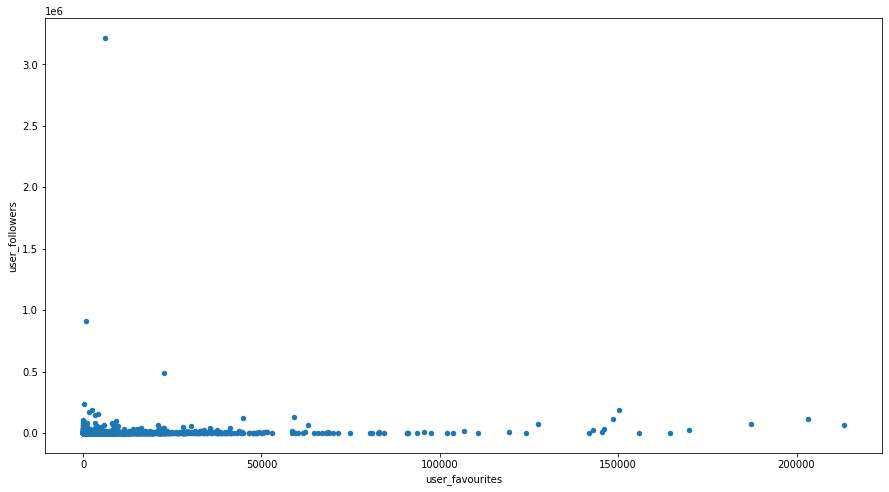

In [30]:
users.plot(kind='scatter', x='user_favourites', y='user_followers', figsize=(15,8))
plt.show();

So far, we've found a strong disaprity to 1 tweet with the blockchain hashtag, a large difference between users in concerns of followers, favorites, and other features. Additionally, many of these popular accounts are less than a year old.

A concept which has grown over popularity are NFTs (non-fungible tokens). They hold several users for digital authentication, but a trend is their user for trading art on different platforms.

Let's see if we can identify how many NFTs exist as popular channels. For our definition, 'popular' will be 2500 followers. We will also be looking at accounts relating to these projects created in the last year. Finally, we will be examining only accounts with 1 tweetcount.

In [31]:
pop = users.loc[(users['user_followers'] >= 1000) & (users['tweetcount'] == 1) & (users['user_1y'] == False)].copy()
pop

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount,user_1y
47,Cool Pups,NaN,#NFT #ART #CNFT \nThe Cool Pups NFTs is a coll...,2021-10-19,4447,365,902,False,1,False
48,Decentralized Bone Society | MINTING LIVE 💀,The Tavern,"10,000 Unique Skulls 💀 | Exclusive Access to T...",2021-08-26,2048,909,1171,False,1,False
50,VesterHoldings,Global,Blockchain enabled technological solutions to ...,2021-08-04,1242,1,3,False,1,False
66,ETH_PACINO,"Montréal, Québec","an old saying goes that time is money, actuall...",2021-06-15,7194,336,4651,False,1,False
180,Forint Finance,NaN,#FORINT TOKEN ⚜️\n\nOfficial Twitter account o...,2021-04-11,1286,31,122,False,1,False
...,...,...,...,...,...,...,...,...,...,...
4796,MultiVac Army,NaN,#MultiVac - unofficial\n\nMTV Mainnet : 0x701a...,2021-08-19,1232,110,936,False,1,False
4824,Funn coin,Funniverse,The cryptocurrency that can provide entertainm...,2021-10-05,2388,22,131,False,1,False
4832,Leticia Thomas,"Orlando, FL",NaN,2021-01-06,2189,2896,82575,False,1,False
4902,HappyMonsters,NaN,200 Newly discovered #HappyMonsters that escap...,2021-09-08,5620,4772,7012,False,1,False


In [32]:
import re
nft = pop.user_description.str.contains('NFT', na=False, flags=re.IGNORECASE, regex=True)
nft

47       True
48      False
50      False
66       True
180     False
        ...  
4796    False
4824    False
4832    False
4902    False
4985    False
Name: user_description, Length: 192, dtype: bool

In [33]:
popnft = pop[nft]
popnft

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount,user_1y
47,Cool Pups,NaN,#NFT #ART #CNFT \nThe Cool Pups NFTs is a coll...,2021-10-19,4447,365,902,False,1,False
66,ETH_PACINO,"Montréal, Québec","an old saying goes that time is money, actuall...",2021-06-15,7194,336,4651,False,1,False
361,The Billionaire Bunker,NaN,9999 billionaire cats stuck in a secret multi-...,2021-10-07,1772,296,0,False,1,False
459,ExtinctionFighterzNFT,NaN,"Driven by the love for #animals, we are creati...",2021-09-19,3397,644,232,False,1,False
472,Okimoto,NaN,The home of NFTs on the Zilliqa blockchain!\n\...,2021-06-24,2175,23,757,False,1,False
592,aWSB.club,decentralized land,Bay Area Wall Street Bets club. aWSB A.P.E Cap...,2021-03-10,2138,599,1172,False,1,False
934,GAMERSE,London,Gaming NFT Social Economy in Metaverse \n\n🔸 h...,2021-03-16,63530,60,64,False,1,False
961,BTF 🦍 FEG_KeV 🚀,FEGcity,#Crypto #DeFi $FEG $ROX $FOMO #8BIT $SSHLD $BT...,2021-01-22,1994,2033,16868,False,1,False
1020,BrasilNFT,NaN,"Tudo de NFT, metaverso, jogos, blockchain, RA,...",2021-04-16,1062,374,722,False,1,False
1024,CryptoSmiley NFT,Moon 🚀🌔,🙂Join the CryptoSmiley NFT community! 999 uniq...,2021-09-16,1999,3998,5037,False,1,False


In [34]:
popnft.sort_values(by='user_created', ascending=True)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount,user_1y
961,BTF 🦍 FEG_KeV 🚀,FEGcity,#Crypto #DeFi $FEG $ROX $FOMO #8BIT $SSHLD $BT...,2021-01-22,1994,2033,16868,False,1,False
2566,AbstractArtist.eth,💗🚀💫,#NFTS\n•https://t.co/1SQuUeycwM• \n•https://t....,2021-02-06,11470,2804,29711,False,1,False
592,aWSB.club,decentralized land,Bay Area Wall Street Bets club. aWSB A.P.E Cap...,2021-03-10,2138,599,1172,False,1,False
1484,Naisha | NFT & Crypto Promoter,NaN,DM to grow your business 💎💎\n\nNFT/Crypto Proj...,2021-03-12,67448,1201,5,False,1,False
1171,Kim Meilee,"Detroit, MI",TwitterBlue - Detroit born. Bachelor in Evolut...,2021-03-15,2612,3944,9752,False,1,False
2928,99Starz,Dubai,We're building the world's biggest NFT yield e...,2021-03-15,1576,32,22,False,1,False
1728,#PIKA Crypto | The Pioneer of Gamefi,NaN,⚡EXPERIENCE THE EVOLUTION Of #GameFI⚡ #PIKA NF...,2021-03-16,9124,104,2011,False,1,False
934,GAMERSE,London,Gaming NFT Social Economy in Metaverse \n\n🔸 h...,2021-03-16,63530,60,64,False,1,False
4431,DEEPSPACE,NaN,DEEPSPACE $DPS is a #play2earn #metaverse on t...,2021-03-25,16142,57,1117,False,1,False
2367,stefan,NaN,#NFT #Crypto \n\nOn the look out for new crypt...,2021-03-28,1062,604,15108,False,1,False


In [35]:
popnft.iloc[11]

user_name                                                  Kim Meilee
user_location                                             Detroit, MI
user_description    TwitterBlue - Detroit born. Bachelor in Evolut...
user_created                                      2021-03-15 00:00:00
user_followers                                                   2612
user_friends                                                     3944
user_favourites                                                  9752
user_verified                                                   False
tweetcount                                                          1
user_1y                                                         False
Name: 1171, dtype: object

In [36]:
popnft = popnft.drop(labels=1171, axis=0)
popnft = popnft.drop(labels=592, axis=0)
popnft = popnft.drop(labels=2367, axis=0)
popnft

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount,user_1y
47,Cool Pups,NaN,#NFT #ART #CNFT \nThe Cool Pups NFTs is a coll...,2021-10-19,4447,365,902,False,1,False
66,ETH_PACINO,"Montréal, Québec","an old saying goes that time is money, actuall...",2021-06-15,7194,336,4651,False,1,False
361,The Billionaire Bunker,NaN,9999 billionaire cats stuck in a secret multi-...,2021-10-07,1772,296,0,False,1,False
459,ExtinctionFighterzNFT,NaN,"Driven by the love for #animals, we are creati...",2021-09-19,3397,644,232,False,1,False
472,Okimoto,NaN,The home of NFTs on the Zilliqa blockchain!\n\...,2021-06-24,2175,23,757,False,1,False
934,GAMERSE,London,Gaming NFT Social Economy in Metaverse \n\n🔸 h...,2021-03-16,63530,60,64,False,1,False
961,BTF 🦍 FEG_KeV 🚀,FEGcity,#Crypto #DeFi $FEG $ROX $FOMO #8BIT $SSHLD $BT...,2021-01-22,1994,2033,16868,False,1,False
1020,BrasilNFT,NaN,"Tudo de NFT, metaverso, jogos, blockchain, RA,...",2021-04-16,1062,374,722,False,1,False
1024,CryptoSmiley NFT,Moon 🚀🌔,🙂Join the CryptoSmiley NFT community! 999 uniq...,2021-09-16,1999,3998,5037,False,1,False
1036,Cosmos Eleven Game,Cosmos,Make Your Team. Stake and Play. The first-ever...,2021-08-23,2817,35,273,False,1,False


In [37]:
popnft = popnft.reset_index(drop=True)
popnft

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,tweetcount,user_1y
0,Cool Pups,NaN,#NFT #ART #CNFT \nThe Cool Pups NFTs is a coll...,2021-10-19,4447,365,902,False,1,False
1,ETH_PACINO,"Montréal, Québec","an old saying goes that time is money, actuall...",2021-06-15,7194,336,4651,False,1,False
2,The Billionaire Bunker,NaN,9999 billionaire cats stuck in a secret multi-...,2021-10-07,1772,296,0,False,1,False
3,ExtinctionFighterzNFT,NaN,"Driven by the love for #animals, we are creati...",2021-09-19,3397,644,232,False,1,False
4,Okimoto,NaN,The home of NFTs on the Zilliqa blockchain!\n\...,2021-06-24,2175,23,757,False,1,False
5,GAMERSE,London,Gaming NFT Social Economy in Metaverse \n\n🔸 h...,2021-03-16,63530,60,64,False,1,False
6,BTF 🦍 FEG_KeV 🚀,FEGcity,#Crypto #DeFi $FEG $ROX $FOMO #8BIT $SSHLD $BT...,2021-01-22,1994,2033,16868,False,1,False
7,BrasilNFT,NaN,"Tudo de NFT, metaverso, jogos, blockchain, RA,...",2021-04-16,1062,374,722,False,1,False
8,CryptoSmiley NFT,Moon 🚀🌔,🙂Join the CryptoSmiley NFT community! 999 uniq...,2021-09-16,1999,3998,5037,False,1,False
9,Cosmos Eleven Game,Cosmos,Make Your Team. Stake and Play. The first-ever...,2021-08-23,2817,35,273,False,1,False


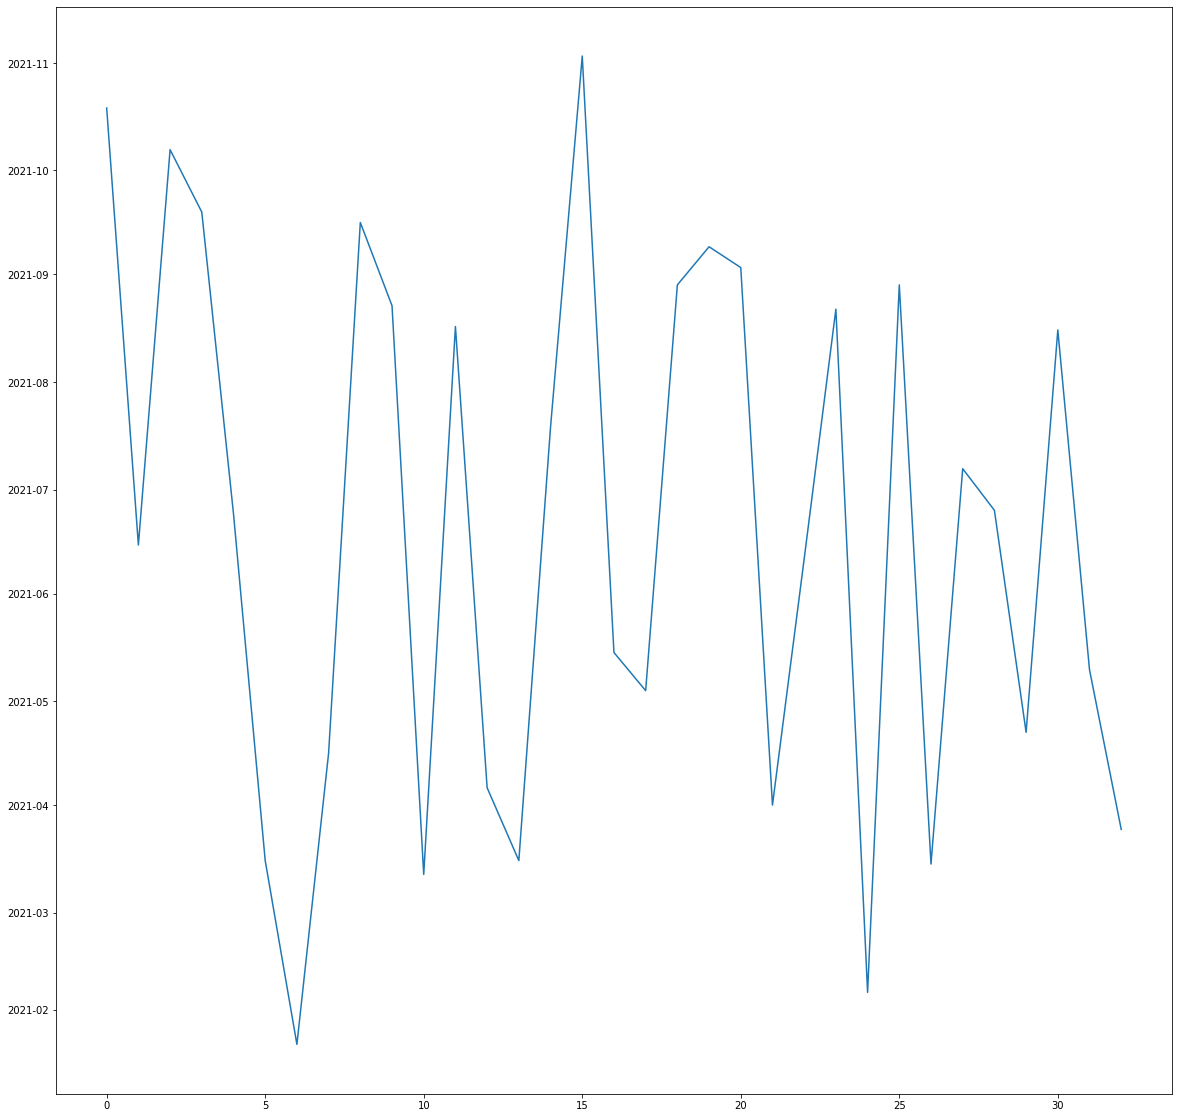

In [38]:
#After removing those not relevant to projects, we have been left with a small amount of 33.
#Let's see how they're distributed across the year.
popnft.user_created.plot()
plt.show()